# **Percentile Method**

# Percentile Method

**percentile_definition** = "A percentile is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations falls. For example, the 20th percentile is the value below which 20% of the data falls."
print(percentile_definition)


The **percentile method** is a statistical technique used to understand the distribution of a dataset by identifying values below which a certain percentage of observations fall. For example, the 25th percentile (Q1) is the value below which 25% of the data lies, the 50th percentile (median) is the value below which 50% of the data lies, and the 75th percentile (Q3) is the value below which 75% of the data lies.

## When to Use

The percentile method is particularly useful in the following scenarios:

1.  **Outlier Detection:** Values significantly above the 99th percentile or below the 1st percentile can be considered outliers.
2.  **Data Distribution Analysis:** To understand the spread and skewness of data, especially when the data is not normally distributed.
3.  **Benchmarking and Performance Evaluation:** Comparing individual performance against a group (e.g., a student's score against the class, a product's sales against competitors).
4.  **Setting Thresholds:** Defining acceptable ranges or cut-off points for various metrics (e.g., setting service level agreements, identifying "top" or "bottom" performers).
5.  **Robust Statistics:** When the mean and standard deviation are heavily influenced by outliers, percentiles (like the median) provide a more robust measure of central tendency and spread.




## Pros

*   **Robust to Outliers:** Percentiles are less affected by extreme values compared to the mean or standard deviation, making them suitable for skewed distributions.
*   **Easy to Understand:** The concept of "X% of data is below this value" is intuitive and easy to communicate to non-technical audiences.
*   **Non-Parametric:** It does not assume any specific distribution for the data, making it applicable to a wide range of datasets.
*   **Provides Context:** Offers a clear picture of where a particular data point stands relative to the rest of the dataset.

## Cons

*   **Loss of Information:** By focusing on specific points, percentiles might obscure the fine-grained details of the data distribution between those points.
*   **Interpolation Issues:** For discrete data or small datasets, calculating percentiles might involve interpolation, which can sometimes lead to values that don't actually exist in the dataset.
*   **Not Suitable for All Analyses:** For analyses requiring precise measures of central tendency or variability in normally distributed data, the mean and standard deviation might be more appropriate.
*   **Sensitivity to Sample Size:** In very small datasets, percentiles can be unstable and less representative.

In [17]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('weight-height.csv')
df.sample(6)

,Gender,Height,Weight
5424,Female,59.335108,120.819870
2920,Male,70.439221,194.096131
5520,Female,62.622337,106.593986
7562,Female,63.470931,130.291661
1267,Male,66.076696,171.292975
113,Male,69.196858,178.685546


In [19]:
# checking for missing data and other details
print(df.shape)
print(df.isna().mean(),'\n')
print(df['Gender'].unique(),'\n')
for col in df.columns:
    print(F"COLUMN NAME : {col}")
    print(df[col].describe(), '\n')


(10000, 3)
Gender    0.0
Height    0.0
Weight    0.0
dtype: float64 

['Male' 'Female'] 

COLUMN NAME : Gender
count     10000
unique        2
top        Male
freq       5000
Name: Gender, dtype: object 

COLUMN NAME : Height
count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64 

COLUMN NAME : Weight
count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64 



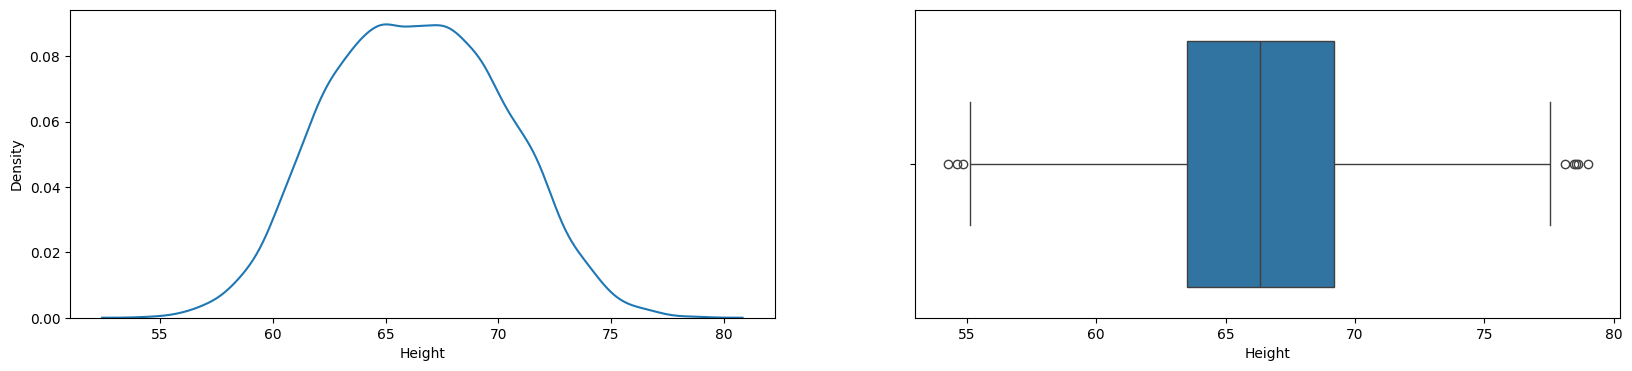

In [27]:
plt.figure(figsize=(20, 4))

plt.subplot(121)
sns.kdeplot(df['Height'])

plt.subplot(122)
sns.boxplot(x=df['Height'])

plt.show()

In [34]:
upper_limit = np.round(df['Height'].quantile(0.7478), 2)      # values above 99 % will be considered outliers 
lower_limit = np.round(df['Height'].quantile(0.5813), 2)      # values below 1 % will be considered outliers 

print(upper_limit)
print(lower_limit)

# storing non-outlier data in a variable
new_df = df[(df['Height'] <= lower_limit) & (df['Height'] >= upper_limit)]
print(new_df.shape)





69.16
67.24
(0, 3)
